In [1]:
import numpy as np

In [2]:
from numpy import arange

In [3]:
import pandas as pd

In [4]:
from pandas import read_table

In [5]:
from pandas import set_option

In [6]:
from pandas.plotting import scatter_matrix

In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

In [9]:
%matplotlib inline

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.model_selection import KFold

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
from sklearn.neighbors import KNeighborsRegressor

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
filename = 'kc_house_data.csv'

In [18]:
dataset = pd.read_csv(filename)

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [20]:
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [21]:
dataset.drop(columns = ['id','date','lat','long','zipcode'], inplace = True)

In [22]:
dataset.shape

(21613, 16)

In [23]:
dataset.count()

price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [24]:
dataset.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [25]:
dataset = dataset.dropna()

In [26]:
dataset.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [27]:
dataset.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,2390,7570


In [28]:
set_option('display.precision', 3)

In [29]:
dataset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161e+04,21613.000,21613.000,21613.000,2.161e+04,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,5.401e+05,3.371,2.115,2079.900,1.511e+04,1.494,0.008,0.234,3.409,7.657,1788.391,291.509,1971.005,84.402,1986.552,12768.456
std,3.671e+05,0.930,0.770,918.441,4.142e+04,0.540,0.087,0.766,0.651,1.175,828.091,442.575,29.373,401.679,685.391,27304.180
min,7.500e+04,0.000,0.000,290.000,5.200e+02,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,399.000,651.000
25%,3.220e+05,3.000,1.750,1427.000,5.040e+03,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,1490.000,5100.000
50%,4.500e+05,3.000,2.250,1910.000,7.618e+03,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,1840.000,7620.000
75%,6.450e+05,4.000,2.500,2550.000,1.069e+04,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,2360.000,10083.000
max,7.700e+06,33.000,8.000,13540.000,1.651e+06,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,6210.000,871200.000


In [30]:
dataset.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000,0.308,0.525,0.702,0.090,0.257,0.266,0.397,0.036,0.667,0.606,0.324,0.054,0.126,0.585,0.082
bedrooms,0.308,1.000,0.516,0.577,0.032,0.175,-0.007,0.080,0.028,0.357,0.478,0.303,0.154,0.019,0.392,0.029
bathrooms,0.525,0.516,1.000,0.755,0.088,0.501,0.064,0.188,-0.125,0.665,0.685,0.284,0.506,0.051,0.569,0.087
sqft_living,0.702,0.577,0.755,1.000,0.173,0.354,0.104,0.285,-0.059,0.763,0.877,0.435,0.318,0.055,0.756,0.183
sqft_lot,0.090,0.032,0.088,0.173,1.000,-0.005,0.022,0.075,-0.009,0.114,0.184,0.015,0.053,0.008,0.145,0.719
floors,0.257,0.175,0.501,0.354,-0.005,1.000,0.024,0.029,-0.264,0.458,0.524,-0.246,0.489,0.006,0.280,-0.011
waterfront,0.266,-0.007,0.064,0.104,0.022,0.024,1.000,0.402,0.017,0.083,0.072,0.081,-0.026,0.093,0.086,0.031
view,0.397,0.080,0.188,0.285,0.075,0.029,0.402,1.000,0.046,0.251,0.168,0.277,-0.053,0.104,0.280,0.073
condition,0.036,0.028,-0.125,-0.059,-0.009,-0.264,0.017,0.046,1.000,-0.145,-0.158,0.174,-0.361,-0.061,-0.093,-0.003
grade,0.667,0.357,0.665,0.763,0.114,0.458,0.083,0.251,-0.145,1.000,0.756,0.168,0.447,0.014,0.713,0.119


array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='price'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='price'>,
        <AxesSubplot:xlabel='floors', ylabel='price'>,
        <AxesSubplot:xlabel='waterfront', ylabel='price'>,
        <AxesSubplot:xlabel='view', ylabel='price'>,
        <AxesSubplot:xlabel='condition', ylabel='price'>,
        <AxesSubplot:xlabel='grade', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_basement', ylabel='price'>,
        <AxesSubplot:xlabel='yr_built', ylabel='price'>,
        <AxesSubplot:xlabel='yr_renovated', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_living15', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_lot15', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='bedrooms'>,
        <AxesSubp

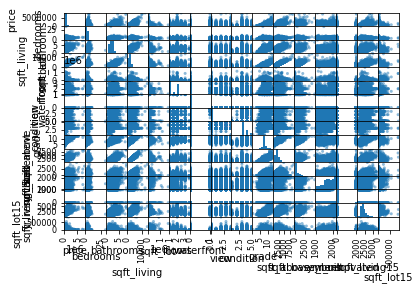

In [31]:
scatter_matrix(dataset)

<AxesSubplot:>

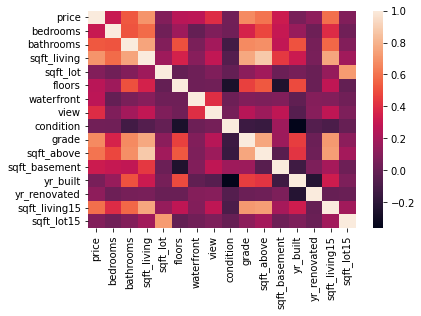

In [32]:
sns.heatmap(dataset.corr())

In [33]:
array = dataset.values

In [34]:
array

array([[2.21900e+05, 3.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        1.34000e+03, 5.65000e+03],
       [5.38000e+05, 3.00000e+00, 2.25000e+00, ..., 1.99100e+03,
        1.69000e+03, 7.63900e+03],
       [1.80000e+05, 2.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.72000e+03, 8.06200e+03],
       ...,
       [4.02101e+05, 2.00000e+00, 7.50000e-01, ..., 0.00000e+00,
        1.02000e+03, 2.00700e+03],
       [4.00000e+05, 3.00000e+00, 2.50000e+00, ..., 0.00000e+00,
        1.41000e+03, 1.28700e+03],
       [3.25000e+05, 2.00000e+00, 7.50000e-01, ..., 0.00000e+00,
        1.02000e+03, 1.35700e+03]])

In [35]:
X = array[:,0:12]
X

array([[2.21900e+05, 3.00000e+00, 1.00000e+00, ..., 7.00000e+00,
        1.18000e+03, 0.00000e+00],
       [5.38000e+05, 3.00000e+00, 2.25000e+00, ..., 7.00000e+00,
        2.17000e+03, 4.00000e+02],
       [1.80000e+05, 2.00000e+00, 1.00000e+00, ..., 6.00000e+00,
        7.70000e+02, 0.00000e+00],
       ...,
       [4.02101e+05, 2.00000e+00, 7.50000e-01, ..., 7.00000e+00,
        1.02000e+03, 0.00000e+00],
       [4.00000e+05, 3.00000e+00, 2.50000e+00, ..., 8.00000e+00,
        1.60000e+03, 0.00000e+00],
       [3.25000e+05, 2.00000e+00, 7.50000e-01, ..., 7.00000e+00,
        1.02000e+03, 0.00000e+00]])

In [36]:
X = array[:,1:]
X

array([[3.000e+00, 1.000e+00, 1.180e+03, ..., 0.000e+00, 1.340e+03,
        5.650e+03],
       [3.000e+00, 2.250e+00, 2.570e+03, ..., 1.991e+03, 1.690e+03,
        7.639e+03],
       [2.000e+00, 1.000e+00, 7.700e+02, ..., 0.000e+00, 2.720e+03,
        8.062e+03],
       ...,
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 0.000e+00, 1.020e+03,
        2.007e+03],
       [3.000e+00, 2.500e+00, 1.600e+03, ..., 0.000e+00, 1.410e+03,
        1.287e+03],
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 0.000e+00, 1.020e+03,
        1.357e+03]])

In [37]:
y = array[:,0]
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [38]:
test_size = 0.2
seed = 42

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [40]:
X_train

array([[3.0000e+00, 1.7500e+00, 1.7800e+03, ..., 0.0000e+00, 2.7500e+03,
        1.3095e+04],
       [2.0000e+00, 1.0000e+00, 1.0000e+03, ..., 0.0000e+00, 1.2700e+03,
        5.0000e+03],
       [3.0000e+00, 1.0000e+00, 1.0800e+03, ..., 0.0000e+00, 1.1700e+03,
        7.8000e+03],
       ...,
       [3.0000e+00, 2.5000e+00, 2.1200e+03, ..., 0.0000e+00, 1.6900e+03,
        2.6500e+03],
       [1.0000e+00, 7.5000e-01, 3.8000e+02, ..., 0.0000e+00, 1.1700e+03,
        1.5000e+04],
       [4.0000e+00, 2.5000e+00, 3.1300e+03, ..., 0.0000e+00, 3.0200e+03,
        5.9970e+03]])

In [41]:
y_train

array([325000., 257000., 228500., ..., 575000., 245000., 315000.])

In [42]:
X_test

array([[4.000e+00, 2.250e+00, 2.070e+03, ..., 0.000e+00, 2.390e+03,
        7.700e+03],
       [5.000e+00, 3.000e+00, 2.900e+03, ..., 0.000e+00, 2.370e+03,
        6.283e+03],
       [4.000e+00, 2.500e+00, 3.770e+03, ..., 0.000e+00, 3.710e+03,
        9.685e+03],
       ...,
       [4.000e+00, 2.500e+00, 2.434e+03, ..., 0.000e+00, 2.434e+03,
        4.400e+03],
       [4.000e+00, 1.750e+00, 2.250e+03, ..., 0.000e+00, 2.050e+03,
        9.750e+03],
       [4.000e+00, 2.500e+00, 2.570e+03, ..., 0.000e+00, 2.430e+03,
        5.997e+03]])

In [43]:
y_test

array([ 365000.,  865000., 1038000., ...,  285000.,  605000.,  356500.])

In [44]:
num_folds = 10
seed = 42

In [45]:
scoring = 'neg_mean_squared_error'

In [46]:
model = KNeighborsRegressor()

In [47]:
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)

In [48]:
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
msg = "KNN: %f (%f)" % (cv_results.mean(), cv_results.std())
print(msg)

KNN: -65966508003.829727 (13280274207.415066)


In [49]:
cv_results

array([-5.98111274e+10, -5.99108982e+10, -6.00829485e+10, -5.95064261e+10,
       -8.90676852e+10, -4.71445484e+10, -8.97212513e+10, -7.39245852e+10,
       -5.62608089e+10, -6.42348009e+10])

In [50]:
scaler = StandardScaler().fit(X_train)

In [51]:
rescaledX_train = scaler.transform(X_train)

In [52]:
rescaledX_train

array([[-0.39526335, -0.47445144, -0.32393262, ..., -0.20829394,
         1.12607326,  0.01344043],
       [-1.46896378, -1.45258323, -1.18365301, ..., -0.20829394,
        -1.04652268, -0.28066159],
       [-0.39526335, -1.45258323, -1.09547656, ..., -0.20829394,
        -1.19331971, -0.1789339 ],
       ...,
       [-0.39526335,  0.50368036,  0.05081729, ..., -0.20829394,
        -0.42997519, -0.36604019],
       [-2.54266422, -1.77862716, -1.8670205 , ..., -0.20829394,
        -1.19331971,  0.08265159],
       [ 0.67843709,  0.50368036,  1.16404497, ..., -0.20829394,
         1.52242522, -0.24443927]])

In [53]:
k_values = np.arange(1,22)

In [54]:
param_grid = dict(n_neighbors=k_values)

In [55]:
model = KNeighborsRegressor()

In [56]:
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)

In [57]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)

In [58]:
grid_results = grid.fit(rescaledX_train, y_train)

In [59]:
grid_results

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])},
             scoring='neg_mean_squared_error')

In [60]:
print("Best: %f using %s" % (grid_results.best_score_, grid_results.best_params_))

Best: -39597747455.447983 using {'n_neighbors': 9}


In [61]:
model = KNeighborsRegressor(n_neighbors=2)

In [62]:
model.fit(rescaledX_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [63]:
rescaledX_test = scaler.transform(X_test)

In [64]:
estimates = model.predict(rescaledX_test)

In [65]:
estimates

array([609337.5, 539975. , 885750. , ..., 319113. , 289444. , 442500. ])

In [66]:
y_test

array([ 365000.,  865000., 1038000., ...,  285000.,  605000.,  356500.])

In [67]:
mean_squared_error(y_test, estimates)

58437919321.908516